In [1]:
# prompt: importa drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PRE-PROCESSING DATA

In [2]:
import pandas as pd

# Carica il dataset
file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/Chennai Sales Data.csv"
data = pd.read_csv(file_path)

# Identifica le colonne categoriche ed escludi le colonne di data
# Presumendo che le colonne di data siano quelle che hanno 'date' nel loro nome
categorical_columns = [col for col in data.columns if data[col].dtype == 'object' and 'date' not in col.lower()]

# Crea un dizionario per memorizzare i valori unici per ciascuna colonna categorica
unique_values_dict = {}

for col in categorical_columns:
    unique_values = data[col].unique()
    unique_values_dict[col] = unique_values

# Crea un DataFrame per memorizzare i valori unici
# Usa un DataFrame con ogni colonna che contiene i valori unici della corrispondente colonna categorica
unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values_dict.items()]))

# Salva il DataFrame in un file CSV
output_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/categorical_unique_values.csv"
unique_values_df.to_csv(output_file_path, index=False)
print("I valori unici per le colonne categoriche sono stati salvati in", output_file_path)


I valori unici per le colonne categoriche sono stati salvati in /content/drive/MyDrive/Colab Notebooks/iconDataset/categorical_unique_values.csv


In [3]:
print(categorical_columns)


['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [4]:


# Definisci le correzioni per le colonne categoriche
corrections = {
    'AREA': {
        # Corregge errori di battitura nei nomi delle aree
        'Karapakam': 'Karapakkam',
        'Chrompt': 'Chrompet',
        'Chrmpet': 'Chrompet',
        'Ana Nagar': 'Anna Nagar',
        'Adyr': 'Adyar',
        'Velchery': 'Velachery',
        'Ann Nagar': 'Anna Nagar',
        'KKNagar': 'KK Nagar',
        'Karapakam': 'Karapakkam',
        'Chormpet': 'Chrompet'
    },
    'SALE_COND': {
        # Unifica le variazioni di scrittura per le condizioni di vendita
        'AbNormal': 'Ab Normal',
        'Ab Normal': 'Ab Normal',
        'Partiall': 'Partial',
        'Adj Land': 'AdjLand',
        'PartiaLl': 'Partial'
    },
    'PARK_FACIL': {
        # Corregge errori di battitura nella disponibilità di parcheggio
        'Noo': 'No'
    },
    'BUILDTYPE': {
        # Corregge errori di battitura nei tipi di costruzione
        'Comercial': 'Commercial',
        'Other': 'Others'
    },
    'UTILITY_AVAIL': {
        # Unifica le variazioni di scrittura per la disponibilità dei servizi
        'ELO': 'AllPub',
        'NoSewr': 'NoSeWa',
        'NoSeWa': 'NoSeWa',
        'All Pub': 'AllPub'
    },
    'STREET': {
        # Corregge errori di battitura nei tipi di strada
        'Pavd': 'Paved',
        'NoAccess': 'No Access'
    }
}

# Carica il dataset
#file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/Chennai Sales Data.csv"
data = pd.read_csv(file_path)

# Applica le correzioni alle colonne categoriche
for col, mapping in corrections.items():
    if col in data.columns:
        data[col] = data[col].replace(mapping)

# Salva i dati corretti in un nuovo file CSV
corrected_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/Chennai_Sales_Data_Corrected.csv"
data.to_csv(corrected_file_path, index=False)
print("Il file corretto è stato salvato.")


Il file corretto è stato salvato.


In [5]:
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import joblib

# Carica il dataset corretto
#file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/Chennai_Sales_Data_Corrected.csv"
house_data = pd.read_csv(corrected_file_path)

# Converti le colonne di data in formato datetime
house_data['DATE_SALE'] = pd.to_datetime(house_data['DATE_SALE'], format='%d-%m-%Y')
house_data['DATE_BUILD'] = pd.to_datetime(house_data['DATE_BUILD'], format='%d-%m-%Y')

# Estrai componenti utili dalle colonne di data
house_data['SALE_YEAR'] = house_data['DATE_SALE'].dt.year
house_data['SALE_MONTH'] = house_data['DATE_SALE'].dt.month
house_data['BUILD_YEAR'] = house_data['DATE_BUILD'].dt.year
house_data['BUILD_AGE'] = house_data['SALE_YEAR'] - house_data['BUILD_YEAR']

# Elimina le colonne originali di data se non sono più necessarie
house_data = house_data.drop(columns=['DATE_SALE', 'DATE_BUILD'])

# Elimina le caratteristiche che sono meno utili per la previsione o che possono portare all'overfitting
house_data = house_data.drop(columns=['PRT_ID', 'SALE_COND', 'STREET', 'MZZONE', 'UTILITY_AVAIL'])

# Gestisci i valori mancanti
num_cols = house_data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
house_data[num_cols] = imputer.fit_transform(house_data[num_cols])

# Codifica le variabili categoriche
cat_cols = house_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    house_data[col] = le.fit_transform(house_data[col])
    label_encoders[col] = le

# Salva i label encoders in un file joblib
label_encoder_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/label_encoders.pkl"
joblib.dump(label_encoders, label_encoder_file_path)

# Salva i dati preelaborati
output_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv"
house_data.to_csv(output_file_path, index=False)
print("Il file preelaborato e i label encoders sono stati salvati.")


Il file preelaborato e i label encoders sono stati salvati.


In [6]:
house_data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SALE_YEAR,SALE_MONTH,BUILD_YEAR,BUILD_AGE
0,4,1004.0,131.0,1.0,1.0,3.0,1,0,4.0,3.9,4.9,4.330,380000.0,144400.0,7600000.0,2011,5,1967,44
1,1,1986.0,26.0,2.0,1.0,5.0,0,0,4.9,4.2,2.5,3.765,760122.0,304049.0,21717770.0,2006,12,1995,11
2,0,909.0,70.0,1.0,1.0,3.0,1,0,4.1,3.8,2.2,3.090,421094.0,92114.0,13159200.0,2012,2,1992,20
3,7,1855.0,14.0,3.0,2.0,5.0,0,2,4.7,3.9,3.6,4.010,356321.0,77042.0,9630290.0,2010,3,1988,22
4,4,1226.0,84.0,1.0,1.0,3.0,1,2,3.0,2.5,4.1,3.290,237000.0,74063.0,7406250.0,2009,10,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598.0,51.0,1.0,1.0,2.0,0,2,3.0,2.2,2.4,2.520,208767.0,107060.0,5353000.0,2011,1,1962,49
7105,7,1897.0,52.0,3.0,2.0,5.0,1,2,3.6,4.5,3.3,3.920,346191.0,205551.0,10818480.0,2004,4,1995,9
7106,7,1614.0,152.0,2.0,1.0,4.0,0,1,4.3,4.2,2.9,3.840,317354.0,167028.0,8351410.0,2006,8,1978,28
7107,4,787.0,40.0,1.0,1.0,2.0,1,0,4.6,3.8,4.1,4.160,425350.0,119098.0,8507000.0,2009,8,1977,32


CORRELAZIONE

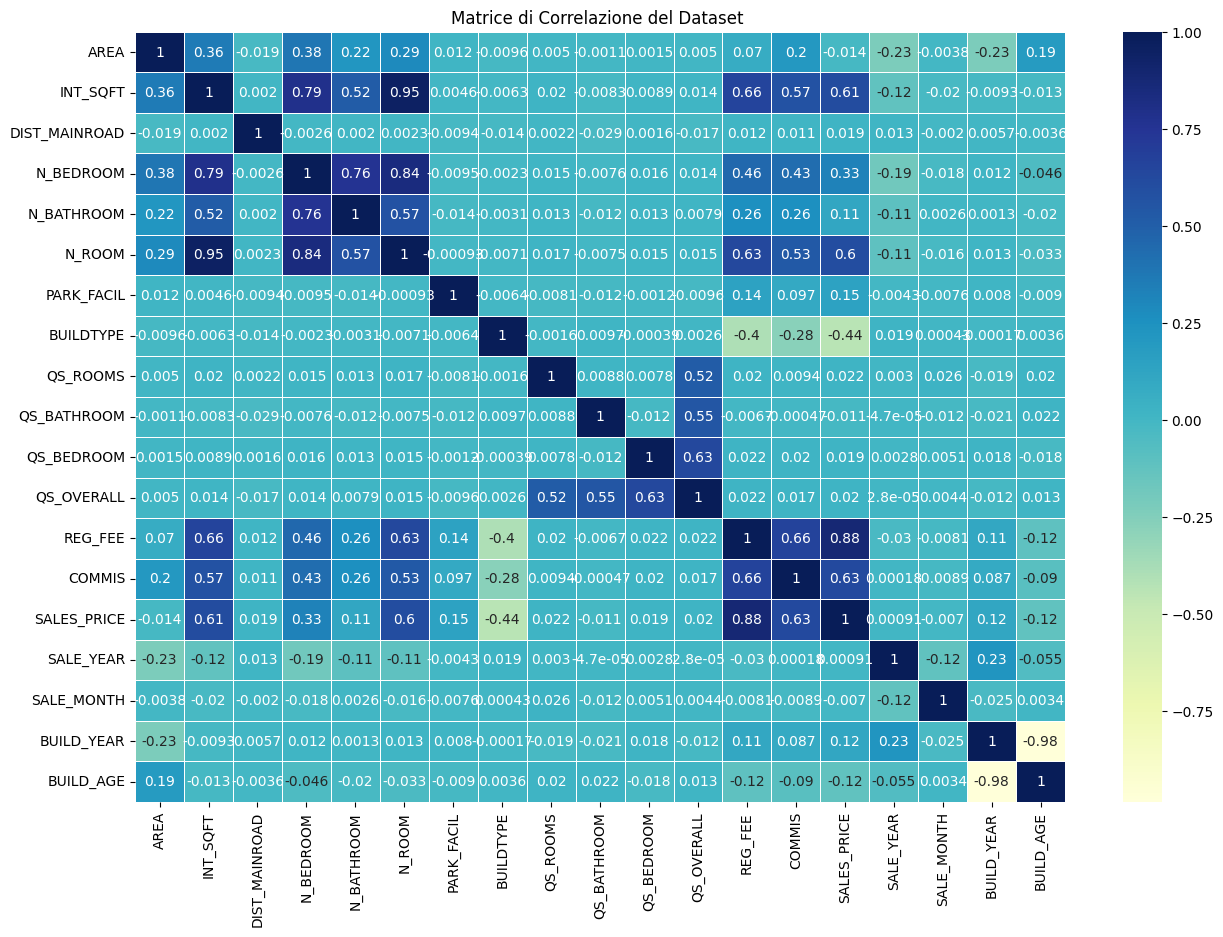

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
correlation_matrix = house_data.corr()

# Crea una mappa di calore (heatmap) per visualizzare le correlazioni
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Matrice di Correlazione del Dataset ")
plt.show()


IMPORTANZA DELLE FEATURE

In [8]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

# Carica i dati preelaborati
house_data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv")

# Definisci le caratteristiche e la variabile target
X = house_data.drop(columns=['SALES_PRICE'])
y = house_data['SALES_PRICE']

# Suddividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestra un modello per valutare l'importanza delle caratteristiche (RandomForestRegressor usato qui come esempio)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Analisi dell'importanza delle caratteristiche
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("Importanza delle caratteristiche:\n", feature_importance.sort_values(by='Importance', ascending=False))

# Opzionalmente: Elimina le caratteristiche con importanza molto bassa se lo si desidera
threshold = 0.01  # Esempio di soglia per l'importanza delle caratteristiche
important_features = feature_importance[feature_importance['Importance'] > threshold]['Feature']
X = X[important_features.tolist()]
print("Selezione delle caratteristiche completata. Caratteristiche selezionate salvate.")



Importanza delle caratteristiche:
           Feature  Importance
12        REG_FEE    0.770348
0            AREA    0.075496
1        INT_SQFT    0.055797
7       BUILDTYPE    0.035141
3       N_BEDROOM    0.015695
4      N_BATHROOM    0.010283
13         COMMIS    0.009797
2   DIST_MAINROAD    0.003198
11     QS_OVERALL    0.002937
8        QS_ROOMS    0.002755
9     QS_BATHROOM    0.002733
6      PARK_FACIL    0.002572
10     QS_BEDROOM    0.002524
14      SALE_YEAR    0.002384
16     BUILD_YEAR    0.002287
17      BUILD_AGE    0.002267
15     SALE_MONTH    0.002081
5          N_ROOM    0.001705
Selezione delle caratteristiche completata. Caratteristiche selezionate salvate.


APPRENDIMENTO SUPERVISIONATO (TRAIN DEI MODELLI CON IPERPARAMETRI E VALUTAZIONE CON METRICHE )

Modelli: RandomForest, Lasso, Ridge, DecisionTree, GradientBoosting

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import time
from sklearn.model_selection import RepeatedKFold

# Carica i dati preelaborati
file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv"
house_data = pd.read_csv(file_path)

# Definisci le caratteristiche e la variabile target in base alle caratteristiche selezionate
selected_features = [
    'REG_FEE', 'AREA', 'INT_SQFT', 'BUILDTYPE', 'N_BEDROOM', 'N_BATHROOM',
    'COMMIS', 'DIST_MAINROAD', 'QS_OVERALL', 'QS_ROOMS', 'QS_BATHROOM',
    'PARK_FACIL', 'QS_BEDROOM', 'SALE_YEAR', 'BUILD_YEAR', 'BUILD_AGE',
    'SALE_MONTH', 'N_ROOM'
]
X = house_data[selected_features]
y = house_data['SALES_PRICE']

# Suddividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisci i modelli e gli iperparametri per la Grid Search
models = {
    'RandomForest': RandomForestRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1, 10]
    },
    'Ridge': {
        'alpha': [0.01, 0.1, 1, 10]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
}



# Definisci il metodo RepeatedKFold
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# Esegui la Grid Search e addestra i modelli
best_models = {}
training_times = {}
prediction_times = {}
mse_scores = {}

# Inizializza variabili per tracciare il miglior modello
best_mse = float("inf")
best_model_name = None

for model_name, model in models.items():
    print(f"Addestramento {model_name} con RepeatedKFold...")
    start_train_time = time.time()
    grid_search = GridSearchCV(
        model,
        param_grids[model_name],
        cv=repeated_kfold,  # Usa RepeatedKFold come metodo di validazione
        scoring='neg_mean_squared_error'
    )
    grid_search.fit(X_train, y_train)

    print(f"Migliori iperparametri per {model_name}: {grid_search.best_params_}")

    best_models[model_name] = grid_search.best_estimator_
    end_train_time = time.time()
    training_time = end_train_time - start_train_time
    training_times[model_name] = training_time

    # Valuta il modello
    start_pred_time = time.time()
    y_pred = best_models[model_name].predict(X_test)
    end_pred_time = time.time()
    prediction_time = end_pred_time - start_pred_time
    prediction_times[model_name] = prediction_time
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse  # Salva il MSE per il confronto
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R²: {r2}")
    print(f"{model_name} Tempo di addestramento: {training_time:.4f} secondi")
    print(f"{model_name} Tempo di predizione: {prediction_time:.4f} secondi \n")

    # Aggiorna il miglior modello in base al MSE
    if mse < best_mse:
        best_mse = mse
        best_model_name = model_name

# Stampa il nome del miglior modello
print(f"\nIl miglior modello è: {best_model_name} con MSE di {best_mse:.4f}")

# Salva il miglior modello
best_model = best_models[best_model_name]
model_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/best_model.pkl"
joblib.dump(best_model, model_file_path)
print("Il miglior modello è stato salvato.")

# Salva il modello Decision Tree in un file separato
if 'DecisionTree' in best_models:
    decision_tree_model = best_models['DecisionTree']
    decision_tree_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/decision_tree_model.pkl"
    joblib.dump(decision_tree_model, decision_tree_file_path)
    print("Il modello Decision Tree è stato salvato.")


Addestramento RandomForest con RepeatedKFold...
Migliori iperparametri per RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
RandomForest MSE: 569347716887.308
RandomForest MAE: 599743.1732908231
RandomForest R²: 0.9566620806856964
RandomForest Tempo di addestramento: 1192.6776 secondi
RandomForest Tempo di predizione: 0.0826 secondi 

Addestramento Lasso con RepeatedKFold...
Migliori iperparametri per Lasso: {'alpha': 0.01}
Lasso MSE: 1901053091383.761
Lasso MAE: 1103899.7229347336
Lasso R²: 0.8552946063663517
Lasso Tempo di addestramento: 2.4902 secondi
Lasso Tempo di predizione: 0.0022 secondi 

Addestramento Ridge con RepeatedKFold...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.59165e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.69311e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.79583e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.66434e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

Migliori iperparametri per Ridge: {'alpha': 1}
Ridge MSE: 1901082187476.7986
Ridge MAE: 1103906.0907978127
Ridge R²: 0.8552923916141097
Ridge Tempo di addestramento: 0.4596 secondi
Ridge Tempo di predizione: 0.0018 secondi 

Addestramento DecisionTree con RepeatedKFold...
Migliori iperparametri per DecisionTree: {'max_depth': 10, 'min_samples_split': 10}
DecisionTree MSE: 851495868330.3887
DecisionTree MAE: 707029.8201996371
DecisionTree R²: 0.9351853741683321
DecisionTree Tempo di addestramento: 6.7610 secondi
DecisionTree Tempo di predizione: 0.0029 secondi 

Addestramento GradientBoosting con RepeatedKFold...
Migliori iperparametri per GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
GradientBoosting MSE: 543835699687.5679
GradientBoosting MAE: 578452.0260879342
GradientBoosting R²: 0.9586040182928095
GradientBoosting Tempo di addestramento: 856.8969 secondi
GradientBoosting Tempo di predizione: 0.0168 secondi 


Il miglior modello è: GradientBoosting co

In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import time

# Carica i dati preelaborati
file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv"
house_data = pd.read_csv(file_path)

# Definisci le caratteristiche e la variabile target in base alle caratteristiche selezionate
selected_features = [
    'REG_FEE', 'AREA', 'INT_SQFT', 'BUILDTYPE', 'N_BEDROOM', 'N_BATHROOM',
    'COMMIS', 'DIST_MAINROAD', 'QS_OVERALL', 'QS_ROOMS', 'QS_BATHROOM',
    'PARK_FACIL', 'QS_BEDROOM', 'SALE_YEAR', 'BUILD_YEAR', 'BUILD_AGE',
    'SALE_MONTH', 'N_ROOM'
]
X = house_data[selected_features]
y = house_data['SALES_PRICE']

# Suddividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisci i modelli e gli iperparametri per la Grid Search
models = {
    'RandomForest': RandomForestRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1, 10]
    },
    'Ridge': {
        'alpha': [0.01, 0.1, 1, 10]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
}

# Esegui la Grid Search e addestra i modelli
best_models = {}
training_times = {}
prediction_times = {}
mse_scores = {}

# Inizializza variabili per tracciare il miglior modello
best_mse = float("inf")
best_model_name = None

for model_name, model in models.items():
    print(f"Addestramento {model_name}...")
    start_train_time = time.time()
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    print(f"Migliori iperparametri per {model_name}: {grid_search.best_params_}")



    best_models[model_name] = grid_search.best_estimator_
    end_train_time = time.time()
    training_time = end_train_time - start_train_time
    training_times[model_name] = training_time

    # Valuta il modello
    start_pred_time = time.time()
    y_pred = best_models[model_name].predict(X_test)
    end_pred_time = time.time()
    prediction_time = end_pred_time - start_pred_time
    prediction_times[model_name] = prediction_time
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse  # Salva il MSE per il confronto
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R²: {r2}")
    print(f"{model_name} Tempo di addestramento: {training_time:.4f} secondi")
    print(f"{model_name} Tempo di predizione: {prediction_time:.4f} secondi \n")

    # Aggiorna il miglior modello in base al MSE
    if mse < best_mse:
        best_mse = mse
        best_model_name = model_name

# Stampa il nome del miglior modello
print(f"\nIl miglior modello è: {best_model_name} con MSE di {best_mse:.4f}")

# Salva il miglior modello
best_model = best_models[best_model_name]
model_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/best_model.pkl"
joblib.dump(best_model, model_file_path)
print("Il miglior modello è stato salvato.")

# Salva il modello Decision Tree in un file separato
if 'DecisionTree' in best_models:
    decision_tree_model = best_models['DecisionTree']
    decision_tree_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/decision_tree_model.pkl"
    joblib.dump(decision_tree_model, decision_tree_file_path)
    print("Il modello Decision Tree è stato salvato.")
'''

Performance Comparison

<ipython-input-11-6a294d56ae9a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette=palette)
<ipython-input-11-6a294d56ae9a>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_values, palette=palette)
<ipython-input-11-6a294d56ae9a>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette=palette)


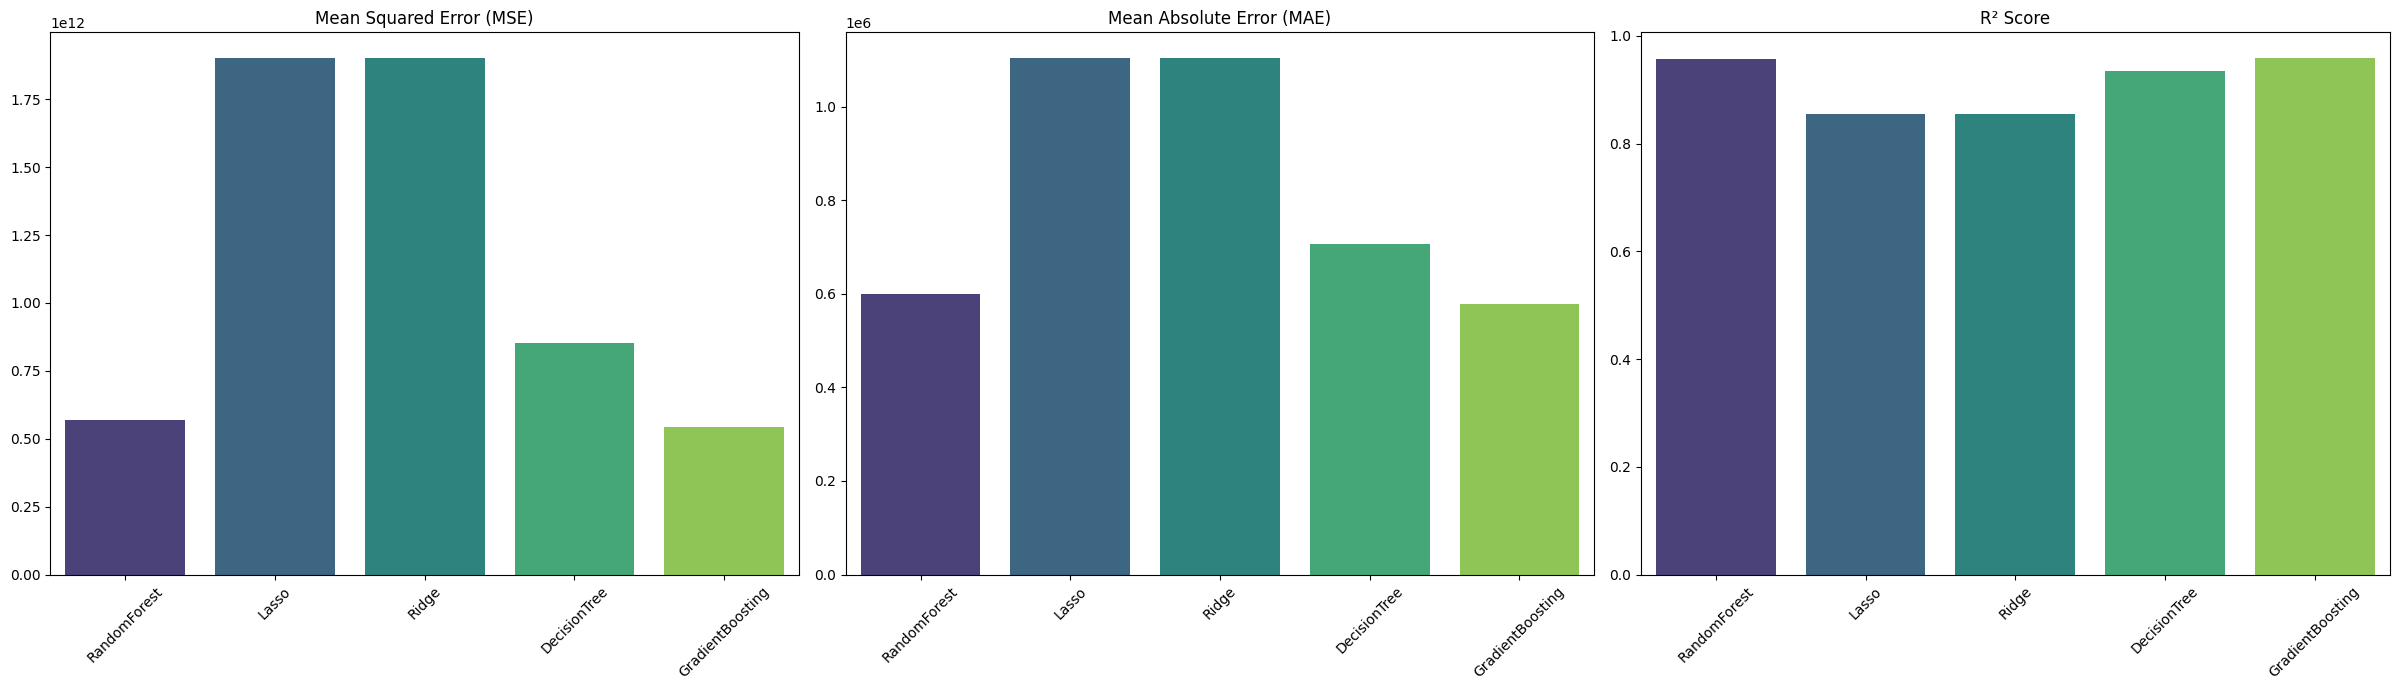

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crea una lista delle metriche per ciascun modello
models = list(best_models.keys())
mse_values = []
mae_values = []
r2_values = []

# Estrai le metriche per ciascun modello
for model_name in models:
    y_pred = best_models[model_name].predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

# Grafico delle metriche
plt.figure(figsize=(40, 7))  # Aumenta la dimensione della figura


# Definisci una palette di colori
palette = "viridis"  # Puoi scegliere altre palette come 'magma', 'plasma', 'cividis', etc.

# Plot MSE
plt.subplot(1, 5, 1)
sns.barplot(x=models, y=mse_values, palette=palette)
plt.title("Mean Squared Error (MSE)")
plt.xticks(rotation=45)

# Plot MAE
plt.subplot(1, 5, 2)
sns.barplot(x=models, y=mae_values, palette=palette)
plt.title("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)

# Plot R² Score
plt.subplot(1, 5, 3)
sns.barplot(x=models, y=r2_values, palette=palette)
plt.title("R² Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Learning Curve


Deviazioni standard e varianze per il modello RandomForest:

|   Train Size |   Train STD |   Train VAR |    Test STD |    Test VAR |
|-------------:|------------:|------------:|------------:|------------:|
|          454 | 2.0948e+10  | 4.38818e+20 | 6.49812e+10 | 4.22255e+21 |
|          909 | 6.78172e+09 | 4.59917e+19 | 5.42275e+10 | 2.94063e+21 |
|         1364 | 4.11808e+09 | 1.69586e+19 | 4.20139e+10 | 1.76516e+21 |
|         1819 | 2.7316e+09  | 7.46165e+18 | 3.54886e+10 | 1.25944e+21 |
|         2274 | 1.4077e+09  | 1.98162e+18 | 3.44648e+10 | 1.18782e+21 |
|         2729 | 2.10199e+09 | 4.41838e+18 | 3.88344e+10 | 1.50811e+21 |
|         3184 | 2.60538e+09 | 6.78802e+18 | 3.39213e+10 | 1.15065e+21 |
|         3639 | 3.97356e+09 | 1.57892e+19 | 3.80103e+10 | 1.44479e+21 |
|         4094 | 2.97169e+09 | 8.83091e+18 | 2.94081e+10 | 8.64839e+20 |
|         4549 | 2.0594e+09  | 4.24115e+18 | 2.7076e+10  | 7.33109e+20 |


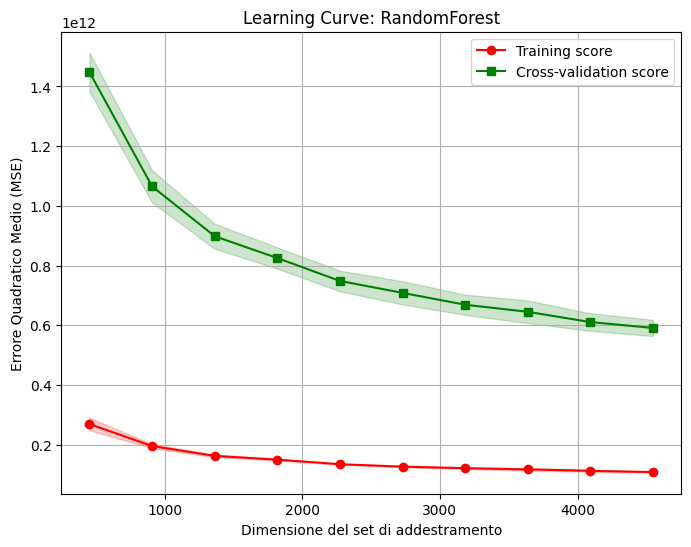


Deviazioni standard e varianze per il modello Lasso:

|   Train Size |   Train STD |   Train VAR |    Test STD |    Test VAR |
|-------------:|------------:|------------:|------------:|------------:|
|          454 | 6.03507e+10 | 3.64221e+21 | 7.01814e+10 | 4.92543e+21 |
|          909 | 3.84271e+10 | 1.47664e+21 | 6.8371e+10  | 4.6746e+21  |
|         1364 | 3.26943e+10 | 1.06892e+21 | 6.684e+10   | 4.46758e+21 |
|         1819 | 2.50379e+10 | 6.26897e+20 | 6.9504e+10  | 4.8308e+21  |
|         2274 | 2.23269e+10 | 4.9849e+20  | 6.94317e+10 | 4.82076e+21 |
|         2729 | 2.11195e+10 | 4.46035e+20 | 6.65387e+10 | 4.42739e+21 |
|         3184 | 2.05621e+10 | 4.228e+20   | 6.51059e+10 | 4.23877e+21 |
|         3639 | 1.73935e+10 | 3.02535e+20 | 6.69634e+10 | 4.4841e+21  |
|         4094 | 1.96694e+10 | 3.86887e+20 | 6.58837e+10 | 4.34066e+21 |
|         4549 | 1.61134e+10 | 2.59642e+20 | 6.49576e+10 | 4.2195e+21  |


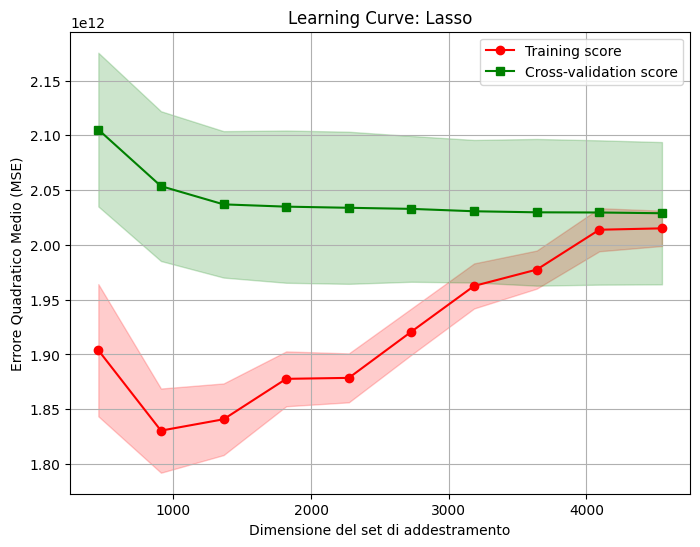


Deviazioni standard e varianze per il modello Ridge:

|   Train Size |   Train STD |   Train VAR |    Test STD |    Test VAR |
|-------------:|------------:|------------:|------------:|------------:|
|          454 | 6.03391e+10 | 3.64081e+21 | 6.92008e+10 | 4.78876e+21 |
|          909 | 3.84385e+10 | 1.47752e+21 | 6.83584e+10 | 4.67287e+21 |
|         1364 | 3.26938e+10 | 1.06889e+21 | 6.67011e+10 | 4.44904e+21 |
|         1819 | 2.5037e+10  | 6.26849e+20 | 6.94195e+10 | 4.81906e+21 |
|         2274 | 2.23265e+10 | 4.98473e+20 | 6.93722e+10 | 4.81251e+21 |
|         2729 | 2.11198e+10 | 4.46044e+20 | 6.65456e+10 | 4.42832e+21 |
|         3184 | 2.05622e+10 | 4.22805e+20 | 6.50953e+10 | 4.2374e+21  |
|         3639 | 1.73937e+10 | 3.02542e+20 | 6.69725e+10 | 4.48531e+21 |
|         4094 | 1.96696e+10 | 3.86892e+20 | 6.5897e+10  | 4.34241e+21 |
|         4549 | 1.61135e+10 | 2.59644e+20 | 6.49657e+10 | 4.22054e+21 |


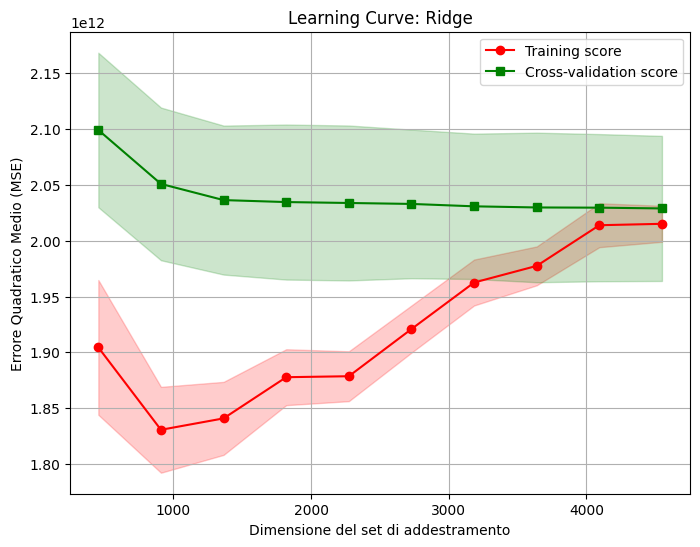


Deviazioni standard e varianze per il modello DecisionTree:

|   Train Size |   Train STD |   Train VAR |    Test STD |    Test VAR |
|-------------:|------------:|------------:|------------:|------------:|
|          454 | 7.41623e+10 | 5.50005e+21 | 3.28261e+11 | 1.07755e+23 |
|          909 | 3.55249e+10 | 1.26202e+21 | 2.35612e+11 | 5.55132e+22 |
|         1364 | 2.65285e+10 | 7.03763e+20 | 1.16094e+11 | 1.34777e+22 |
|         1819 | 2.62122e+10 | 6.8708e+20  | 1.06348e+11 | 1.13099e+22 |
|         2274 | 2.23508e+10 | 4.99557e+20 | 6.29273e+10 | 3.95985e+21 |
|         2729 | 1.34182e+10 | 1.80047e+20 | 9.0065e+10  | 8.11171e+21 |
|         3184 | 1.99404e+10 | 3.97621e+20 | 4.60862e+10 | 2.12394e+21 |
|         3639 | 1.88197e+10 | 3.54179e+20 | 7.33643e+10 | 5.38232e+21 |
|         4094 | 1.55106e+10 | 2.40579e+20 | 5.73714e+10 | 3.29148e+21 |
|         4549 | 1.953e+10   | 3.81422e+20 | 5.59892e+10 | 3.13479e+21 |


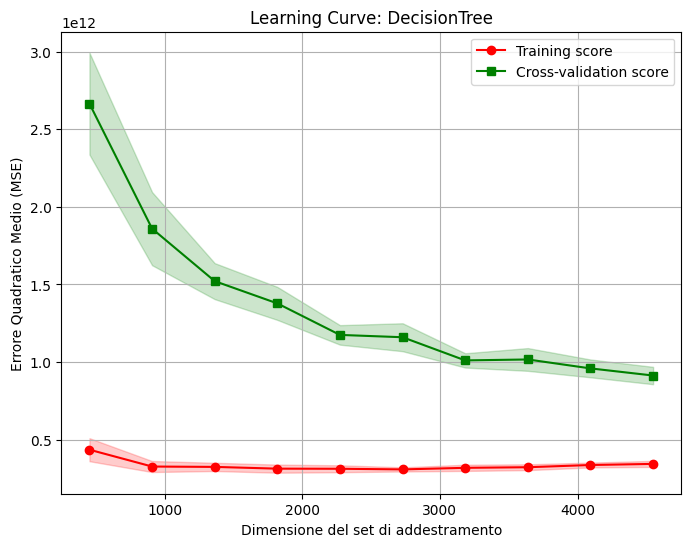


Deviazioni standard e varianze per il modello GradientBoosting:

|   Train Size |   Train STD |   Train VAR |    Test STD |    Test VAR |
|-------------:|------------:|------------:|------------:|------------:|
|          454 | 3.63836e+08 | 1.32377e+17 | 7.47126e+10 | 5.58197e+21 |
|          909 | 2.03449e+09 | 4.13914e+18 | 4.30014e+10 | 1.84912e+21 |
|         1364 | 3.77639e+09 | 1.42611e+19 | 3.5218e+10  | 1.24031e+21 |
|         1819 | 4.0837e+09  | 1.66766e+19 | 3.41347e+10 | 1.16518e+21 |
|         2274 | 2.94045e+09 | 8.64627e+18 | 3.40405e+10 | 1.15876e+21 |
|         2729 | 3.22412e+09 | 1.0395e+19  | 3.47356e+10 | 1.20656e+21 |
|         3184 | 4.57141e+09 | 2.08978e+19 | 2.66803e+10 | 7.11837e+20 |
|         3639 | 3.03392e+09 | 9.20468e+18 | 3.20261e+10 | 1.02567e+21 |
|         4094 | 4.64037e+09 | 2.1533e+19  | 2.56115e+10 | 6.5595e+20  |
|         4549 | 4.40431e+09 | 1.93979e+19 | 3.13319e+10 | 9.81689e+20 |


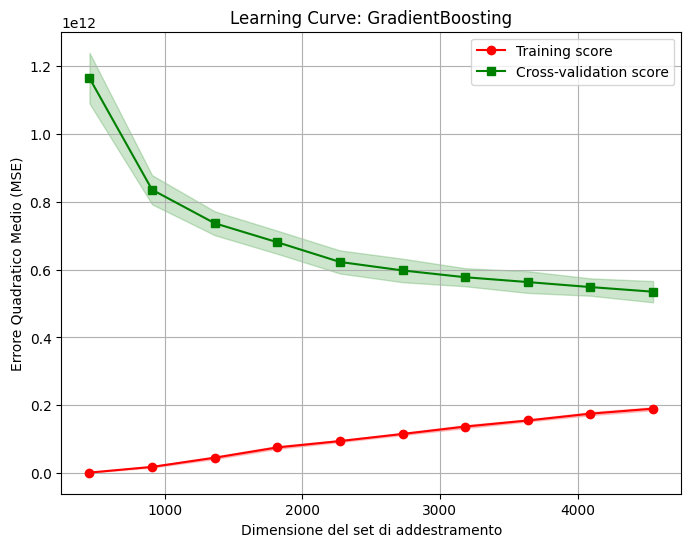

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, RepeatedKFold
import numpy as np

# Definisci il metodo RepeatedKFold
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# Funzione per stampare deviazioni standard e varianze, e creare curve di apprendimento
def plot_learning_curves_and_stats(model, model_name, X_train, y_train):
    # Calcola la curva di apprendimento
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=repeated_kfold, n_jobs=-1, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calcolo media e deviazione standard
    train_mean = np.mean(-train_scores, axis=1)  # MSE positivo
    train_std = np.std(-train_scores, axis=1)
    test_mean = np.mean(-test_scores, axis=1)
    test_std = np.std(-test_scores, axis=1)

    # Calcolo varianza
    train_var = train_std ** 2
    test_var = test_std ** 2

    # Organizza deviazioni standard e varianze in un dataframe
    std_var_data = pd.DataFrame({
        "Train Size": train_sizes,
        "Train STD": train_std,
        "Train VAR": train_var,
        "Test STD": test_std,
        "Test VAR": test_var
    })

    # Mostra il dataframe tabellare
    print(f"\nDeviazioni standard e varianze per il modello {model_name}:\n")
    print(std_var_data.to_markdown(index=False))

    # Grafico della curva di apprendimento
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training score", color="red", marker="o")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="red", alpha=0.2)

    plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green", marker="s")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Dimensione del set di addestramento")
    plt.ylabel("Errore Quadratico Medio (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return std_var_data  # Restituisci i dati per analisi

# Genera i risultati per ciascun modello
results_analysis = {}
for model_name, model in best_models.items():
    results_analysis[model_name] = plot_learning_curves_and_stats(model, model_name, X_train, y_train)


PREDIZIONE PREZZO CASA, (INPUT UTENTE = automatico)

In [15]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Carica il modello addestrato e gli encoder delle etichette
model_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/best_model.pkl"
model = joblib.load(model_file_path)

label_encoder_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/label_encoders.pkl"
label_encoders = joblib.load(label_encoder_file_path)

# Carica il dataset preelaborato per il filtraggio
data_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv"
data = pd.read_csv(data_file_path)

# Determina le caratteristiche attese dal modello
try:
    if hasattr(model, 'feature_names_in_'):
        expected_features = model.feature_names_in_.tolist()
    else:
        # Usa una lista di fallback se i nomi delle caratteristiche non sono disponibili
        expected_features = [
            'AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
            'BUILDTYPE', 'PARK_FACIL', 'QS_ROOMS', 'QS_BATHROOM',
            'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
            'SALE_YEAR', 'BUILD_YEAR', 'SALE_MONTH', 'BUILD_AGE', 'DIST_MAINROAD'
        ]
except Exception as e:
    print(f"Error determining feature names: {e}")
    expected_features = []

# Genera valori casuali per la previsione
areas = ['Adyar', 'Anna Nagar', 'Chrompet', 'Karapakkam', 'KK Nagar', 'TNagar', 'T Nagar', 'Velachery']
build_types = ['Commercial', 'House', 'Others']
park_facil_options = ['Yes', 'No']

area_filter = np.random.choice(areas)
build_type_filter = np.random.choice(build_types)
park_facil_filter = np.random.choice(park_facil_options)
int_sqft = np.random.uniform(500, 5000)  # Genera un numero casuale tra 500 e 5000
n_bedroom = np.random.randint(1, 6)  # Genera un numero intero casuale tra 1 e 5
n_bathroom = np.random.randint(1, 4)  # Genera un numero intero casuale tra 1 e 3
n_room = n_bedroom + n_bathroom + np.random.randint(1, 3)  # Totale stanze
qs_rooms = np.random.uniform(0, 10)  # Qualità stanze
qs_bathroom = np.random.uniform(0, 10)  # Qualità bagno
qs_bedroom = np.random.uniform(0, 10)  # Qualità camera
qs_overall = np.random.uniform(0, 10)  # Qualità complessiva
sale_year = np.random.randint(int(data["SALE_YEAR"].min()), int(data["SALE_YEAR"].max()) + 1)
build_year = np.random.randint(int(data["BUILD_YEAR"].min()), int(data["BUILD_YEAR"].max()) + 1)
sale_month = np.random.randint(1, 13)  # Mese della vendita
reg_fee = np.random.uniform(5000, 50000)  # Tassa di registrazione
commis = np.random.uniform(1000, 10000)  # Commissione

# Stampa i dati generati
print("\n### Dati Generati Randomicamente:")
print(f"- Area: {area_filter}")
print(f"- Tipo di Edificio: {build_type_filter}")
print(f"- Facilità di Parco: {park_facil_filter}")
print(f"- Metri Quadrati Interni: {int_sqft:.2f}")
print(f"- Numero di Camere da Letto: {n_bedroom}")
print(f"- Numero di Bagni: {n_bathroom}")
print(f"- Totale Stanze: {n_room}")
print(f"- Qualità Stanze (0-10): {qs_rooms:.2f}")
print(f"- Qualità Bagno (0-10): {qs_bathroom:.2f}")
print(f"- Qualità Camera (0-10): {qs_bedroom:.2f}")
print(f"- Qualità Complessiva (0-10): {qs_overall:.2f}")
print(f"- Tassa di Registrazione (INR): {reg_fee:.2f}")
print(f"- Commissione (INR): {commis:.2f}")
print(f"- Anno di Vendita: {sale_year}")
print(f"- Anno di Costruzione: {build_year}")
print(f"- Mese di Vendita: {sale_month}")

# Calcola l'ETÀ_COSTRUZIONE
current_year = datetime.now().year
build_age = current_year - build_year

# Valore segnaposto per DIST_MAINROAD
dist_mainroad = 'No'  # Valore segnaposto; regola in base al tuo dataset
encoded_dist_mainroad = label_encoders['DIST_MAINROAD'].transform([dist_mainroad])[0] if 'DIST_MAINROAD' in label_encoders else 0

# Codifica le caratteristiche categoriche usando gli encoder delle etichette salvati
encoded_area = label_encoders['AREA'].transform([area_filter])[0]
encoded_build_type = label_encoders['BUILDTYPE'].transform([build_type_filter])[0]
encoded_park_facil = label_encoders['PARK_FACIL'].transform([park_facil_filter])[0]

# Prepara i dati di input per la previsione
input_data = pd.DataFrame({
    'AREA': [encoded_area],
    'INT_SQFT': [int_sqft],
    'N_BEDROOM': [n_bedroom],
    'N_BATHROOM': [n_bathroom],
    'N_ROOM': [n_room],
    'BUILDTYPE': [encoded_build_type],
    'PARK_FACIL': [encoded_park_facil],
    'QS_ROOMS': [qs_rooms],
    'QS_BATHROOM': [qs_bathroom],
    'QS_BEDROOM': [qs_bedroom],
    'QS_OVERALL': [qs_overall],
    'REG_FEE': [reg_fee],
    'COMMIS': [commis],
    'SALE_YEAR': [sale_year],
    'BUILD_YEAR': [build_year],
    'SALE_MONTH': [sale_month],
    'BUILD_AGE': [build_age],
    'DIST_MAINROAD': [encoded_dist_mainroad]
}, columns=expected_features)  # Assicurati che tutte le colonne siano presenti e nell'ordine corretto

# Prevedi il prezzo della casa
try:
    prediction = model.predict(input_data)
    avg_predicted_price_inr = prediction[0]

    # Converti da INR a Euro (supponendo un tasso di cambio di 1 Euro = 90 INR)
    exchange_rate = 90.0  # Esempio di tasso di cambio
    avg_predicted_price_euro = avg_predicted_price_inr / exchange_rate

    print(f"\n### Prezzo Previsto della Casa: {avg_predicted_price_inr:,.2f} INR")
    print(f"### Prezzo Previsto della Casa: {avg_predicted_price_euro:,.2f} Euro")

except Exception as e:
    print(f"Error in prediction: {e}")



### Dati Generati Randomicamente:
- Area: KK Nagar
- Tipo di Edificio: House
- Facilità di Parco: Yes
- Metri Quadrati Interni: 684.06
- Numero di Camere da Letto: 4
- Numero di Bagni: 3
- Totale Stanze: 9
- Qualità Stanze (0-10): 3.50
- Qualità Bagno (0-10): 2.44
- Qualità Camera (0-10): 4.68
- Qualità Complessiva (0-10): 3.43
- Tassa di Registrazione (INR): 15390.09
- Commissione (INR): 1686.82
- Anno di Vendita: 2011
- Anno di Costruzione: 1949
- Mese di Vendita: 4

### Prezzo Previsto della Casa: 6,187,832.66 INR
### Prezzo Previsto della Casa: 68,753.70 Euro


PROLOG

classificazione basata su regole

In [16]:
!apt-get install swi-prolog
!pip install pyswip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  autopoint debhelper debugedit dh-autoreconf dh-strip-nondeterminism dwz gettext gettext-base
  intltool-debian libarchive-cpio-perl libarchive-zip-perl libdebhelper-perl
  libfile-stripnondeterminism-perl libmail-sendmail-perl libossp-uuid16 libsub-override-perl
  libsys-hostname-long-perl libtool po-debconf swi-prolog-core swi-prolog-core-packages
  swi-prolog-doc swi-prolog-nox swi-prolog-x
Suggested packages:
  dh-make gettext-doc libasprintf-dev libgettextpo-dev uuid libtool-doc gcj-jdk libmail-box-perl
  elpa-ediprolog swi-prolog-java swi-prolog-odbc swi-prolog-bdb
The following NEW packages will be installed:
  autopoint debhelper debugedit dh-autoreconf dh-strip-nondeterminism dwz gettext gettext-base
  intltool-debian libarchive-cpio-perl libarchive-zip-perl libdebhelper-perl
  libfile-stripnondeterminism-perl libmail-sendmail-p

In [17]:
from sklearn.tree import _tree
import joblib
from pyswip import Prolog
from datetime import datetime
import pandas as pd

# Funzione per convertire l'albero in codice Prolog
def tree_to_prolog(regressor, node_id=0, parent_id=None):
    base_code = """
% Predice il prezzo di una casa in base alle caratteristiche fornite
predire_prezzo(Features, Prezzo) :-
    percorri_albero(0, Features, Prezzo).

% Passo base
percorri_albero(NodeID, _, Predizione) :-
    leaf(NodeID, Predizione).

% Passo ricorsivo
percorri_albero(NodeID, Features, Predizione) :-
    node(NodeID, FeatureIndex, Threshold, LeftChild, RightChild),
    nth0(FeatureIndex, Features, FeatureValue),
    (FeatureValue =< Threshold ->
        percorri_albero(LeftChild, Features, Predizione)
    ;
        percorri_albero(RightChild, Features, Predizione)).
"""

    result = ""
    # Controlla se è un nodo foglia
    if regressor.tree_.children_left[node_id] == -1:
        value = regressor.tree_.value[node_id][0, 0]
        result += f"leaf({node_id}, {value}).\n"
    else:
        feature = regressor.tree_.feature[node_id]
        threshold = regressor.tree_.threshold[node_id]
        left_child = regressor.tree_.children_left[node_id]
        right_child = regressor.tree_.children_right[node_id]
        result += f"node({node_id}, {feature}, {threshold}, {left_child}, {right_child}).\n"
        result += tree_to_prolog(regressor, left_child, node_id)
        result += tree_to_prolog(regressor, right_child, node_id)

    if parent_id is None:
        return base_code + result
    return result

# Funzione per raccogliere input dall'utente
def get_user_input():
    # Genera valori casuali per la previsione
    areas = ['Adyar', 'Anna Nagar', 'Chrompet', 'Karapakkam', 'KK Nagar', 'TNagar', 'T Nagar', 'Velachery']
    build_types = ['Commercial', 'House', 'Others']
    park_facil_options = ['Yes', 'No']

    area_filter = np.random.choice(areas)
    build_type_filter = np.random.choice(build_types)
    park_facil_filter = np.random.choice(park_facil_options)
    int_sqft = np.random.randint(500, 5000)
    n_bedroom = np.random.randint(1, 6)
    n_bathroom = np.random.randint(1, 4)
    n_room = n_bedroom + n_bathroom + np.random.randint(1, 3)
    qs_rooms = np.random.randint(0, 10)
    qs_bathroom = np.random.randint(0, 10)
    qs_bedroom = np.random.randint(0, 10)
    qs_overall = np.random.randint(0, 10)
    sale_year = np.random.randint(int(data["SALE_YEAR"].min()), int(data["SALE_YEAR"].max()) + 1)
    build_year = np.random.randint(int(data["BUILD_YEAR"].min()), int(data["BUILD_YEAR"].max()) + 1)
    sale_month = np.random.randint(1, 13)
    reg_fee = np.random.uniform(5000, 50000)
    commis = np.random.uniform(1000, 10000)

    return (area_filter, build_type_filter, park_facil_filter, int_sqft, n_bedroom, n_room, n_bathroom,
            qs_rooms, qs_bathroom, qs_bedroom, qs_overall, reg_fee, commis, sale_year, build_year, sale_month)

# Carica il modello addestrato
model_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/decision_tree_model.pkl"
decision_tree_model = joblib.load(model_file_path)

# Estrai e salva le regole in formato Prolog
pl_code = tree_to_prolog(decision_tree_model)
with open("/content/drive/MyDrive/Colab Notebooks/iconDataset/decision_tree_rules.pl", "w", encoding="utf-8") as f:
    f.write(pl_code)

# Carica il file Prolog
prolog = Prolog()
prolog.consult("/content/drive/MyDrive/Colab Notebooks/iconDataset/decision_tree_rules.pl")

# Raccogli input dall'utente
(area_filter, build_type_filter, park_facil_filter, int_sqft,
 n_bedroom, n_room, n_bathroom, qs_rooms, qs_bathroom,
 qs_bedroom, qs_overall, reg_fee, commis, sale_year,
 build_year, sale_month) = get_user_input()

# Codifica le caratteristiche categoriche usando gli encoder delle etichette
encoded_area = label_encoders['AREA'].transform([area_filter])[0]
encoded_build_type = label_encoders['BUILDTYPE'].transform([build_type_filter])[0]
encoded_park_facil = label_encoders['PARK_FACIL'].transform([park_facil_filter])[0]

# Calcola l'ETÀ_COSTRUZIONE
current_year = datetime.now().year
build_age = current_year - build_year

# Valore segnaposto per DIST_MAINROAD
dist_mainroad = 'No'
#encoded_dist_mainroad = label_encoders['DIST_MAINROAD'].transform([dist_mainroad])[0]

# Prepara i dati di input per la previsione
input_data = pd.DataFrame({
    'AREA': [encoded_area],
    'INT_SQFT': [int_sqft],
    'N_BEDROOM': [n_bedroom],
    'N_BATHROOM': [n_bathroom],
    'N_ROOM': [n_room],
    'BUILDTYPE': [encoded_build_type],
    'PARK_FACIL': [encoded_park_facil],
    'QS_ROOMS': [qs_rooms],
    'QS_BATHROOM': [qs_bathroom],
    'QS_BEDROOM': [qs_bedroom],
    'QS_OVERALL': [qs_overall],
    'REG_FEE': [reg_fee],
    'COMMIS': [commis],
    'SALE_YEAR': [sale_year],
    'BUILD_YEAR': [build_year],
    'SALE_MONTH': [sale_month],
    'BUILD_AGE': [build_age],
    'DIST_MAINROAD': [encoded_dist_mainroad]
}, columns=decision_tree_model.feature_names_in_)  # Assicurati che tutte le colonne siano presenti e nell'ordine corretto

# Previsione con il modello Decision Tree
tree_pred = decision_tree_model.predict(input_data)[0]

# Esegui la previsione con Prolog
features = [encoded_area, int_sqft, n_bedroom, n_bathroom, n_room, encoded_build_type, encoded_park_facil, qs_rooms,
            qs_bathroom, qs_bedroom, qs_overall, reg_fee, commis, sale_year, build_year, sale_month, build_age, encoded_dist_mainroad]
prolog_result = list(prolog.query(f"predire_prezzo({features}, Prediction)"))[0]['Prediction']

# Stampa i risultati
print(f"Predizione Prolog: {prolog_result}")
print(f"Predizione Decision Tree: {tree_pred}")
print(f"Features usate per Prolog: {features}")


Predizione Prolog: 2156875.0
Predizione Decision Tree: 2156875.0
Features usate per Prolog: [7, 4461, 3, 2, 6, 0, 0, 9, 7, 0, 4, 6628.289796190923, 6285.12037154747, 2013, 1972, 2, 53, 0]


APPRENDIMENTO BAYESIANO

In [18]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.5 MB/s eta 0:00:00


In [19]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Carica il dataset
data_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv"
df = pd.read_csv(data_file_path)

# Elimina le colonne specificate
columns_to_drop = ['N_BEDROOM', 'N_BATHROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALE_MONTH' ,  'SALE_YEAR' , 'BUILD_AGE']
df = df.drop(columns=columns_to_drop)

# Crea il discretizzatore
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Seleziona colonne numeriche
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Applica la discretizzazione
df[numeric_cols] = discretizer.fit_transform(df[numeric_cols])

# Controlla il risultato
print(df.head())


   AREA  INT_SQFT  DIST_MAINROAD  N_ROOM  PARK_FACIL  BUILDTYPE  QS_OVERALL  \
0   2.0       1.0            3.0     1.0         4.0        0.0         3.0   
1   0.0       3.0            0.0     3.0         0.0        0.0         2.0   
2   0.0       1.0            1.0     1.0         4.0        0.0         1.0   
3   4.0       3.0            0.0     3.0         0.0        4.0         3.0   
4   2.0       1.0            2.0     1.0         4.0        4.0         2.0   

   REG_FEE  COMMIS  SALES_PRICE  BUILD_YEAR  
0      1.0     1.0          1.0         1.0  
1      3.0     3.0          4.0         3.0  
2      1.0     0.0          2.0         3.0  
3      1.0     0.0          1.0         3.0  
4      0.0     0.0          1.0         2.0  


In [20]:
from pgmpy.estimators import HillClimbSearch

# Inizializza HillClimbSearch
hc = HillClimbSearch(df)

# Apprendi la struttura della rete
best_model = hc.estimate()

# Stampa gli archi della rete
print(best_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('AREA', 'COMMIS'), ('AREA', 'BUILD_YEAR'), ('INT_SQFT', 'AREA'), ('INT_SQFT', 'REG_FEE'), ('INT_SQFT', 'SALES_PRICE'), ('INT_SQFT', 'COMMIS'), ('INT_SQFT', 'BUILD_YEAR'), ('DIST_MAINROAD', 'AREA'), ('DIST_MAINROAD', 'SALES_PRICE'), ('DIST_MAINROAD', 'COMMIS'), ('DIST_MAINROAD', 'REG_FEE'), ('DIST_MAINROAD', 'BUILD_YEAR'), ('N_ROOM', 'INT_SQFT'), ('N_ROOM', 'AREA'), ('N_ROOM', 'SALES_PRICE'), ('N_ROOM', 'COMMIS'), ('N_ROOM', 'REG_FEE'), ('N_ROOM', 'BUILD_YEAR'), ('PARK_FACIL', 'AREA'), ('PARK_FACIL', 'SALES_PRICE'), ('PARK_FACIL', 'COMMIS'), ('PARK_FACIL', 'REG_FEE'), ('PARK_FACIL', 'BUILD_YEAR'), ('BUILDTYPE', 'REG_FEE'), ('BUILDTYPE', 'AREA'), ('BUILDTYPE', 'SALES_PRICE'), ('BUILDTYPE', 'COMMIS'), ('BUILDTYPE', 'BUILD_YEAR'), ('QS_OVERALL', 'AREA'), ('QS_OVERALL', 'SALES_PRICE'), ('QS_OVERALL', 'COMMIS'), ('QS_OVERALL', 'REG_FEE'), ('QS_OVERALL', 'BUILD_YEAR'), ('REG_FEE', 'COMMIS'), ('REG_FEE', 'AREA'), ('REG_FEE', 'BUILD_YEAR'), ('COMMIS', 'BUILD_YEAR'), ('SALES_PRICE', 'AREA'), (

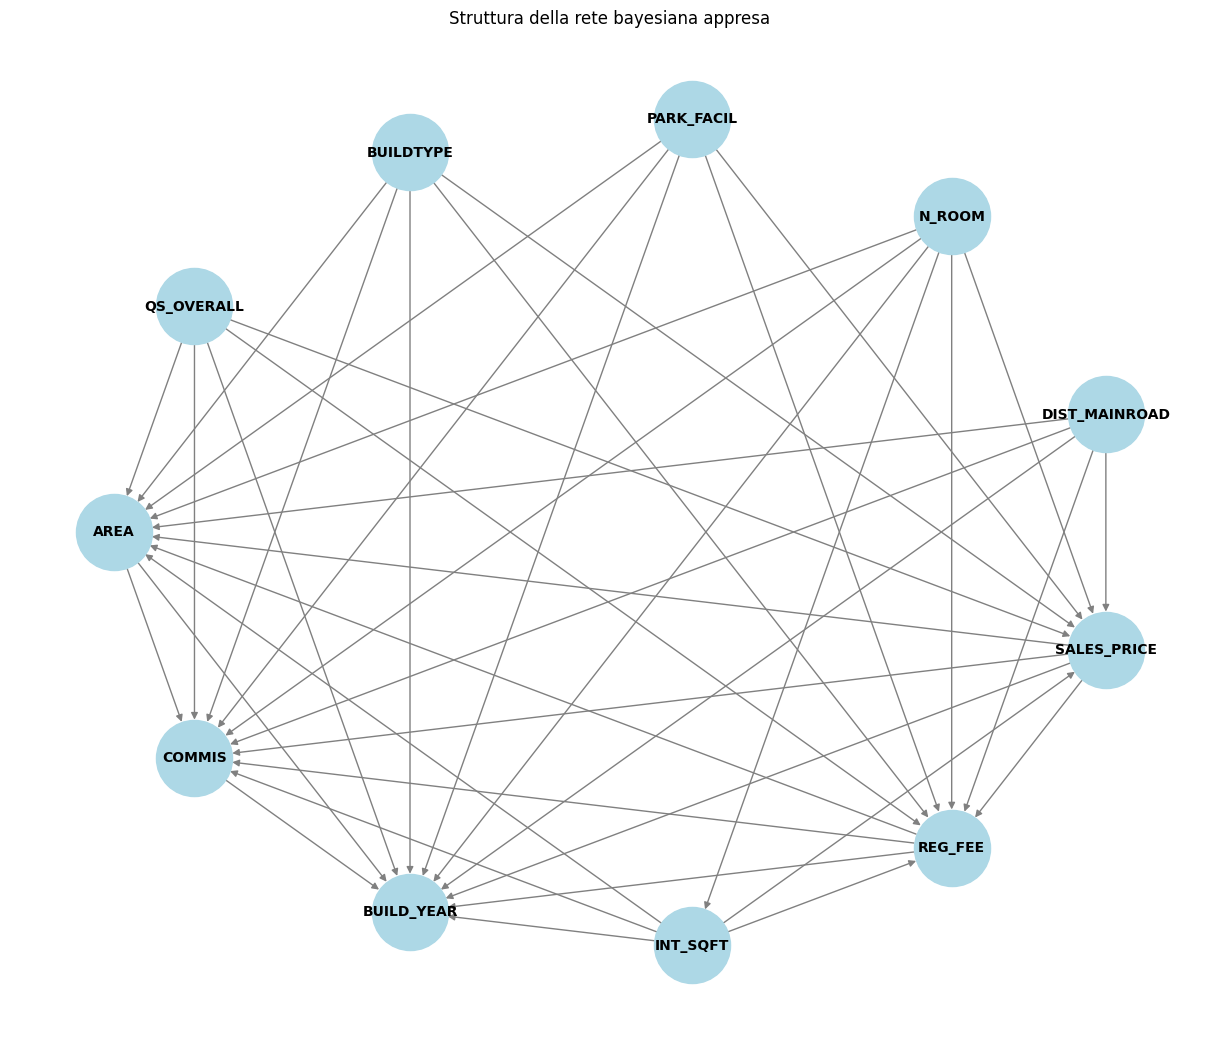

In [21]:
# Mostra grafico della struttura appresa
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(best_model.edges())

# Draw the graph with a shell layout
plt.figure(figsize=(12, 10))
pos = nx.shell_layout(G)  # use shell layout for better separation of nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue",
        font_size=10, font_weight="bold", arrows=True, edge_color="gray")
plt.title("Struttura della rete bayesiana appresa")
plt.show()

# A -> B significa che A influenza direttamente B

In [22]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

model = BayesianNetwork(best_model.edges())

model.fit(df, estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=len(df) / 100)

assert model.check_model()



In [23]:
variabili = ["SALES_PRICE"]
for cpd in model.get_cpds():
    if cpd.variable in variabili:
        print(f"CPD per variabile {cpd.variable}")
        print(cpd)

CPD per variabile SALES_PRICE
+------------------+----------------------+-----+---------------------+
| BUILDTYPE        | BUILDTYPE(0.0)       | ... | BUILDTYPE(4.0)      |
+------------------+----------------------+-----+---------------------+
| DIST_MAINROAD    | DIST_MAINROAD(0.0)   | ... | DIST_MAINROAD(4.0)  |
+------------------+----------------------+-----+---------------------+
| INT_SQFT         | INT_SQFT(0.0)        | ... | INT_SQFT(4.0)       |
+------------------+----------------------+-----+---------------------+
| N_ROOM           | N_ROOM(0.0)          | ... | N_ROOM(4.0)         |
+------------------+----------------------+-----+---------------------+
| PARK_FACIL       | PARK_FACIL(0.0)      | ... | PARK_FACIL(4.0)     |
+------------------+----------------------+-----+---------------------+
| QS_OVERALL       | QS_OVERALL(0.0)      | ... | QS_OVERALL(4.0)     |
+------------------+----------------------+-----+---------------------+
| SALES_PRICE(0.0) | 0.00372092779

In [24]:
from pgmpy.inference import VariableElimination

# Inferenza con la rete bayesiana
inference = VariableElimination(model)

def get_valid_states(model):
    valid_states = {}
    for cpd in model.get_cpds():
        valid_states[cpd.variable] = cpd.state_names[cpd.variable]
    return valid_states

def filter_evidence(evidence, valid_states):
    filtered_evidence = {}
    for var, val in evidence.items():
        if var in valid_states and val in valid_states[var]:
            filtered_evidence[var] = val
        else:
            print(f"Valore non valido: {val} per la variabile {var}. Stati accettati: {valid_states.get(var)}")
    return filtered_evidence

def infer_query(variables, evidence):
    valid_states = get_valid_states(model)
    evidence = filter_evidence(evidence, valid_states)
    evidence = {k: v for k, v in evidence.items() if k not in variables}
    predicted_vars = inference.map_query(variables, evidence)
    print(f"Evidence: {evidence}")
    print(f'Predicted variables: {predicted_vars}')
    return predicted_vars

# Esempio di inferenza con una riga del dataset
evidence_example = dict(df.iloc[4])
infer_query(variables=["SALES_PRICE"], evidence=evidence_example)

# Esempio di inferenza con evidenze definite manualmente
evidence_example = {
    'AREA': 3,
    'BUILDTYPE': 1,
    'INT_SQFT': 2,
    'PARK_FACIL': 1
}
infer_query(["SALES_PRICE"], evidence=evidence_example)

# Stampa di una riga specifica del dataset discretizzato
n = 10
print("Evidence from row:", dict(df.iloc[n]))

# Inferenza con la riga n-esima del dataset
evidence_from_row = dict(df.iloc[n])
infer_query(variables=["SALES_PRICE"], evidence=evidence_from_row)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Evidence: {'AREA': 2.0, 'INT_SQFT': 1.0, 'DIST_MAINROAD': 2.0, 'N_ROOM': 1.0, 'PARK_FACIL': 4.0, 'BUILDTYPE': 4.0, 'QS_OVERALL': 2.0, 'REG_FEE': 0.0, 'COMMIS': 0.0, 'BUILD_YEAR': 2.0}
Predicted variables: {'SALES_PRICE': 1.0}
Valore non valido: 1 per la variabile BUILDTYPE. Stati accettati: [0.0, 2.0, 4.0]
Valore non valido: 1 per la variabile PARK_FACIL. Stati accettati: [0.0, 4.0]


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Evidence: {'AREA': 3, 'INT_SQFT': 2}
Predicted variables: {'SALES_PRICE': 2.0}
Evidence from row: {'AREA': 1.0, 'INT_SQFT': 1.0, 'DIST_MAINROAD': 1.0, 'N_ROOM': 2.0, 'PARK_FACIL': 4.0, 'BUILDTYPE': 0.0, 'QS_OVERALL': 3.0, 'REG_FEE': 1.0, 'COMMIS': 1.0, 'SALES_PRICE': 2.0, 'BUILD_YEAR': 2.0}


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Evidence: {'AREA': 1.0, 'INT_SQFT': 1.0, 'DIST_MAINROAD': 1.0, 'N_ROOM': 2.0, 'PARK_FACIL': 4.0, 'BUILDTYPE': 0.0, 'QS_OVERALL': 3.0, 'REG_FEE': 1.0, 'COMMIS': 1.0, 'BUILD_YEAR': 2.0}
Predicted variables: {'SALES_PRICE': 2.0}


{'SALES_PRICE': 2.0}